# DETECCIÓN DE OBJETOS DE CLASES NO PRE-ENTRENADAS

Para la mejora del proceso de detección de eventos de cumpleaños se entrenará una red YOLO sobre imagenes de velas de cumpleaños. Este tipo de objetos no ha sido preentrenado en los modelos YOLO v8 proporcionados por Ultralytics.


# 0. Importación packages y constantes

In [47]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Packages propios
from utils.objectdetection import ObjectDetectionHelper
from utils.graphdbmanipulation import ImagesGraphDB
from utils.imagesmanipulation import ImageHelper
from utils.analytics import AnalyticsHelper

In [148]:
# Rutas de interés
PATH_IMAGENES_A_ANALIZAR = "./resources/images/Movil-S21"
PATH_MODELO_YOLO_COCO = "./models/yolov8x.pt"
PATH_COCO_LABELS_REF_FILE = "./resources/reference_labels/coco_labels.csv"
PATH_COCO_GML_FILE = './outputs/graph_databases/graph_OBJECTS.gml'
PATH_COCO_DETECTED_LABELS = './outputs/detected_objects/Movil-S21_labels_predicted_COCO/labels'
# Modelo para la detección de llamas de velas
PATH_MODELO_YOLO_CANDLE_LIGHT = "./models/yolov8x_candle_light.pt"
PATH_CANDLE_LIGHT_DETECTED_LABELS= './outputs/detected_objects/Movil-S21_labels_predicted_CANDLE_LIGHT/labels'
PATH_CANDLE_LIGHT_LABELS_REF_FILE =  "./resources/reference_labels/candle_light_labels.csv"
# Modelo para la detección de rios y lagos
PATH_MODELO_YOLO_RIVERS_LAKES = "./models/yolov8x_rivers_lakes.pt"
PATH_RIVERS_LAKES_DETECTED_LABELS = './outputs/detected_objects/Movil-S21_labels_predicted_RIVERS_LAKES/labels'
PATH_RIVERS_LAKES_LABELS_REF_FILE =  "./resources/reference_labels/rivers_lakes_labels.csv"
# Modelo para la detección de rios y lagos alternativo
PATH_MODELO_YOLO_RIVERS_LAKES2 = "./models/yolov8x_rivers_lakes2.pt"
PATH_RIVERS_LAKES2_DETECTED_LABELS = './outputs/detected_objects/Movil-S21_labels_predicted_RIVERS_LAKES2/labels'
PATH_RIVERS_LAKES2_LABELS_REF_FILE =  "./resources/reference_labels/rivers_lakes_labels2.csv"
# GRAFO DE DETECCIÓN DE OBJETOS COCO y PERSONALIZADOS
PATH_COCO_AND_CUSTOM_OBJECTS_GML_FILE = './outputs/graph_databases/graph_COCO_CUSTOM.gml'
PATH_RIVERS_LAKES_GML_FILE = './outputs/graph_databases/graph_RIVERS_LAKES.gml'

# 1. Entrenamiento de red YOLO para la detección de "llamas de velas"

Se entrena la red YOLO para detectar llamas de velas sobre un conjunto de 100 imágenes.

In [6]:
# Load a pretrained YOLO model (recommended for training)
model = YOLO(model= PATH_MODELO_YOLO_COCO)

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='./resources/YOLO_yaml/yolo_v8_candle_light.yaml', epochs=10, batch=10,name='./models/yolov8x_candle_light')

# Evaluate the model's performance on the validation set
results = model.val()


New https://pypi.org/project/ultralytics/8.0.80 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.53  Python-3.10.11 torch-1.13.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=./models/yolov8x.pt, data=./resources/YOLO_yaml/yolo_v8_candle_light.yaml, epochs=10, patience=50, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=./models/yolov8x_candle_light, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, 

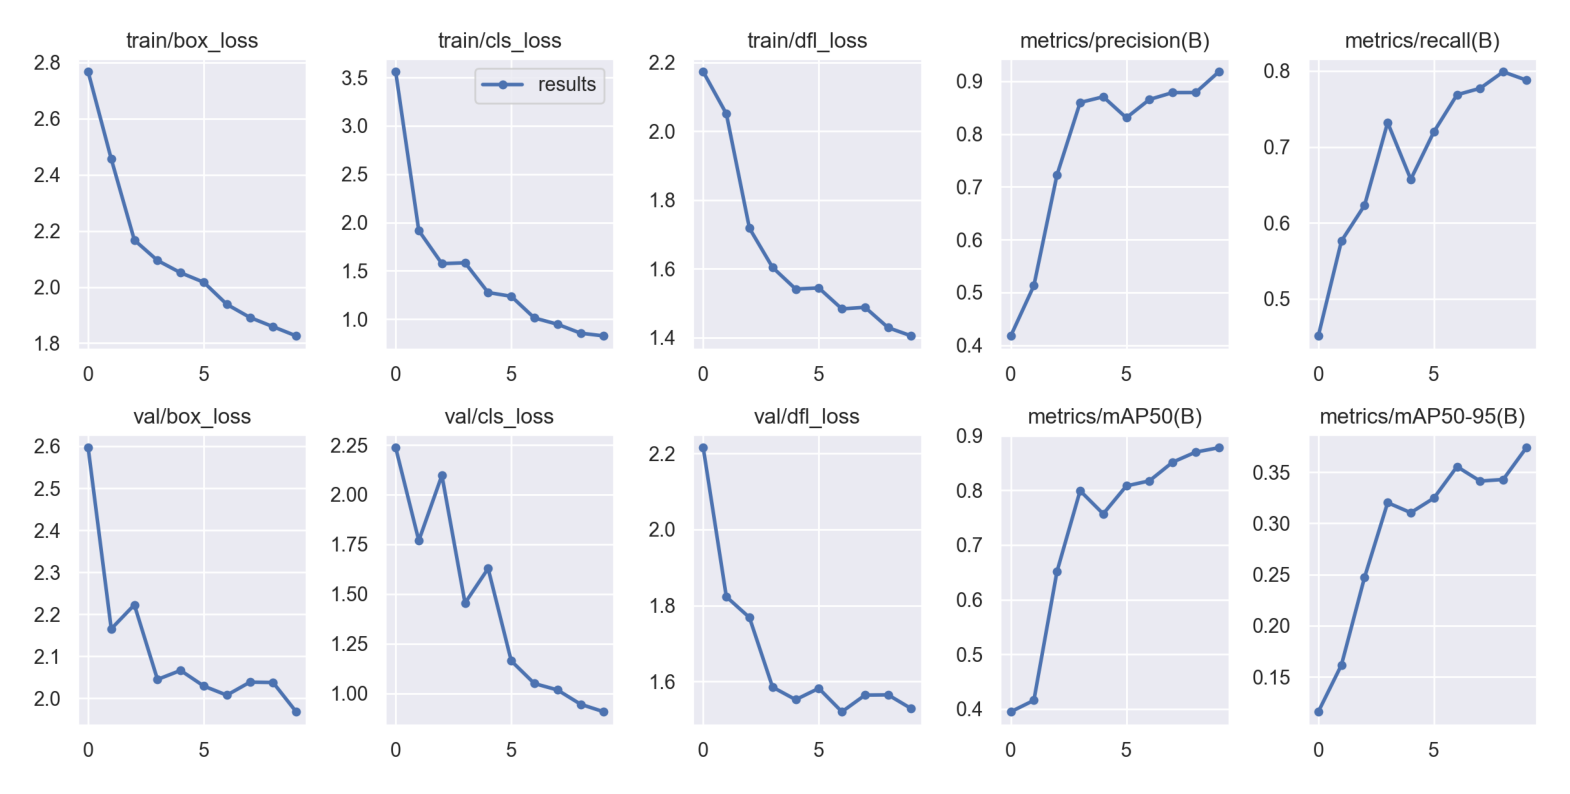

In [31]:
# Se muestran los resultados del entrenamiento y validación
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 20))
ax.axis('off')
img = np.asarray(Image.open('./outputs/models_train_val_results/yolov8x_candle_light/results.png'))
ax.imshow(img)

# 2. Detección de "velas" en imágenes

A partir del nuevo modelo obtenido especializado en encontrar "llamas de velas" en imagenes se analizan todas las imagenes de estudio de cara poder detectar velas de cumpleaños y poder "cribar" de un mejor modo eventos de cumpleaños.

In [19]:
objectdetector = ObjectDetectionHelper()
objectdetector.detectionTrainedClasses('./models/yolov8x_candle_light.pt',PATH_IMAGENES_A_ANALIZAR,0.2)


image 1/1 C:\Users\dcsj\Repositorios\UOC_TFM\image_classifier\resources\images\Movil-S21\20210724_100218.jpg: 640x480 (no detections), 1865.6ms
Speed: 0.0ms preprocess, 1865.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
4 labels saved to runs\detect\predict\labels

image 1/1 C:\Users\dcsj\Repositorios\UOC_TFM\image_classifier\resources\images\Movil-S21\20210724_104730.jpg: 480x640 (no detections), 2408.3ms
Speed: 0.0ms preprocess, 2408.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
4 labels saved to runs\detect\predict\labels

image 1/1 C:\Users\dcsj\Repositorios\UOC_TFM\image_classifier\resources\images\Movil-S21\20210724_104736.jpg: 480x640 (no detections), 2932.7ms
Speed: 1.0ms preprocess, 2932.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
4 labels saved to runs\detect\predict\labels

image 1/1 C:\Users\dc

# 3. Análisis de resultados de la mejora de detección de cumpleaños añadiendo detección de "velas"

## 3.1. Carga de etiquetas manuales

In [ ]:
df_images_labeled_manually = pd.read_excel('./resources/manual_labels/etiquetado_manual_imagenes.xlsx',skiprows=1)
df_images_labeled_manually.head(10)

## 3.2. Evaluación del modelo

### 3.2.1. Imágenes con objetos detectados (persona, pastel) - opción 1

In [ ]:
# Se cargan los datos desde un fichero gml de los objetos detectados
imagesGraphDB = ImagesGraphDB()
imagesGraphDB.load_graph_from_gml_file(PATH_COCO_GML_FILE)

In [ ]:
# Se cargan el grafo con los objetos detectados en cada imagen
imagesGraphDB.load_graph_from_yolo_detected_objects_txt_files(PATH_CANDLE_LIGHT_LABELS_REF_FILE,PATH_CANDLE_LIGHT_DETECTED_LABELS)
# Se guarda el grafo en la carpeta de "outputs" en fichero gml
imagesGraphDB.write_gml_file(PATH_COCO_AND_CUSTOM_OBJECTS_GML_FILE)

In [ ]:
# Se obtiene las imágenes del grafo que se relacionan con los nodos "person" y "cake"
object_classes_to_filter = ['person','cake'] # Se cogerán las imágenes con pasteles, personas y velas encendidas
neighbors_cake = imagesGraphDB.get_images_containing_list_object_types(object_classes_to_filter)
cake_images_filepath_list = []
cake_images_filename_list = []
for neighbor_cake in neighbors_cake:
    cake_images_filepath_list.append(os.path.join(PATH_IMAGENES_A_ANALIZAR+'_resized',neighbor_cake))
    cake_images_filename_list.append(neighbor_cake)

# Se cargan las imágenes en formato PIL en una lista pora poderlas mostrar en un grid
images_rgb_list= []
for i, image in enumerate(cake_images_filepath_list):
    image_rgb = Image.open(image)
    images_rgb_list.append(image_rgb)

# Se muestran las imagenes en un grid usando un metodo propio del helper de imágenes
%matplotlib inline
ImageHelper.display_images(images_rgb_list,columns=3,max_images=20,label_font_size=12)

### 3.2.2. Matriz de confusión - opción 1

In [ ]:
# Primero se obtienen los valores de "Cumpleaños" etiquetados manualmente en todas las imágenes.
df_images_birthday_manual = df_images_labeled_manually[['Image','Cumpleaños']].copy()
# Se obtienen las imágenes del grafo que contienen los tres tipos de objetos
neighbors_birthday = imagesGraphDB.get_images_containing_list_object_types_with_min_confidence(['person','cake'],[0.7,0.7])
# Se obtiene el dataframe de imágenes detectadas mediante el primer modelo
df_images_birthday_detected = pd.DataFrame(neighbors_birthday, columns=['Image'])
df_images_birthday_detected['Cumpleaños predicted'] =1
# Se cruzan ambos dataframes
df_images_birthday_analysis = df_images_birthday_manual.merge(df_images_birthday_detected , how="left", left_on="Image", right_on="Image")
# Se informa con valor 0 aquellas imagenes sin detección de rios y lagos
# en lugar de NA
df_images_birthday_analysis['Cumpleaños predicted'] = df_images_birthday_analysis['Cumpleaños predicted']. fillna(0)

# Se convierte a int la columna ya que se usa como booleano
df_images_birthday_analysis['Cumpleaños predicted'] = df_images_birthday_analysis['Cumpleaños predicted'].astype('int')

df_images_birthday_analysis

In [ ]:
from sklearn import metrics

# Se cargan los resultados de la predicción y el real
images_birthday_actual= df_images_birthday_analysis['Rios/lagos'].to_numpy()
images_birthday_actual= df_images_birthday_analysis['Rios/lagos predicted'].to_numpy()
# Se cargan los datos para generar la matriz de confusión
confusion_matrix = metrics.confusion_matrix(images_birthday_actual, images_birthday_actual)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# Se muestra el gráfico
cm_display.plot()
plt.show()

### 3.2.3. Métricas -opción 1

In [ ]:
analyticsHelper = AnalyticsHelper()
metrics = analyticsHelper.getBinaryClassificationConfusionMatrixMetrics(confusion_matrix)
metrics

### 3.2.1. Imágenes con objetos detectados (persona, pastel, llama de vela) - opción 2

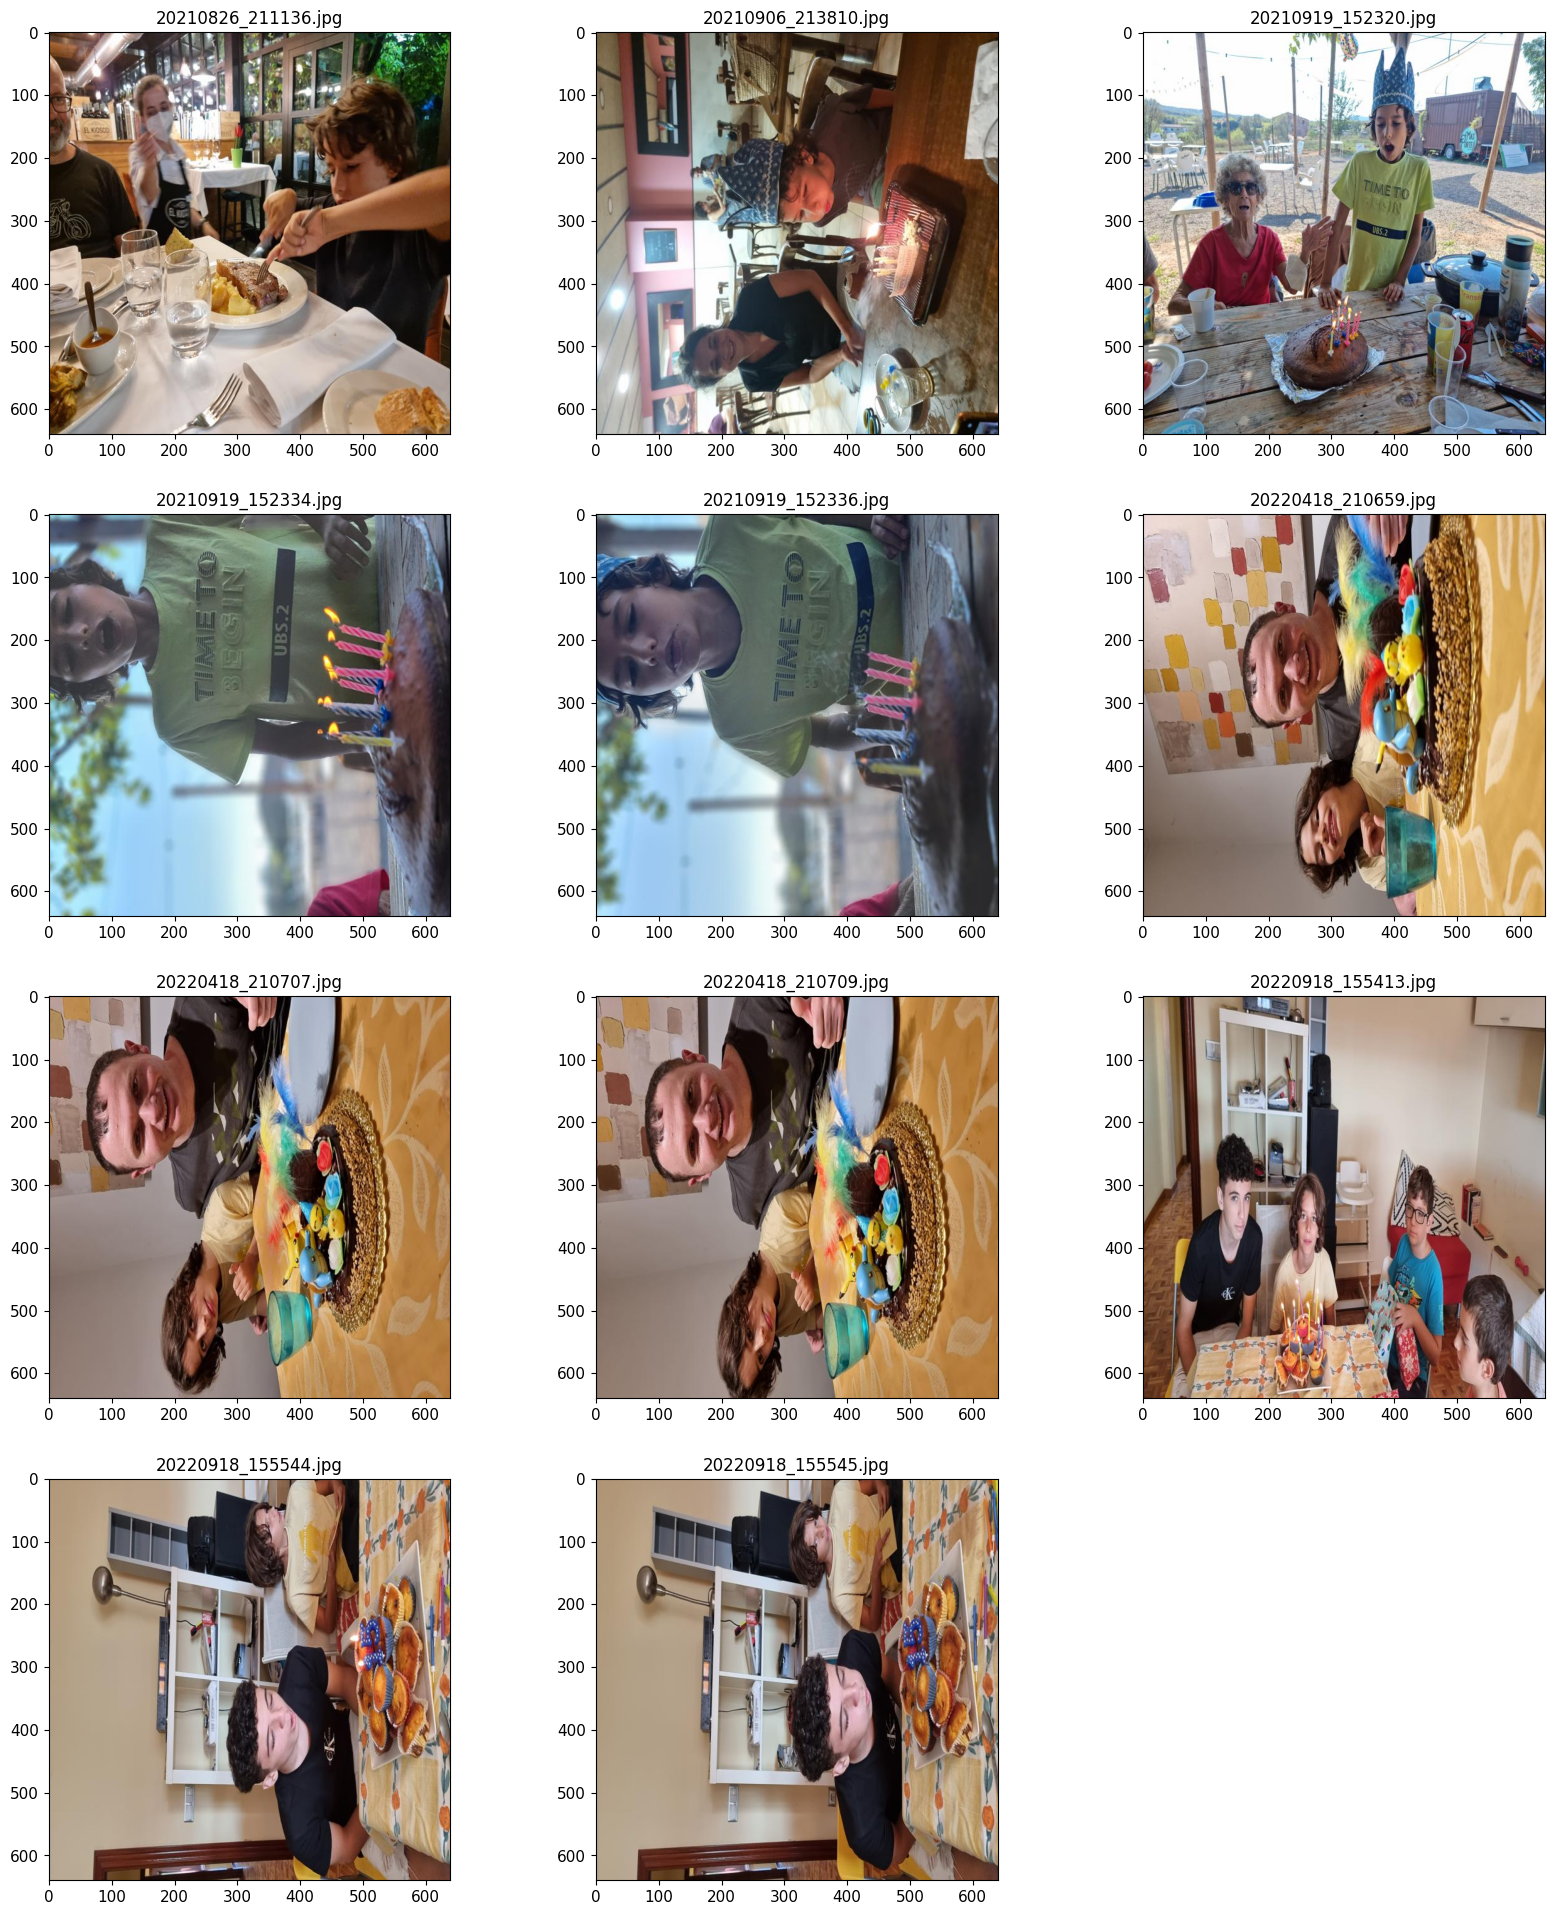

In [10]:
# Se obtiene las imágenes del grafo que se relacionan con los nodos "person" y "cake"
object_classes_to_filter = ['person','cake','candle_light'] # Se cogerán las imágenes con pasteles, personas y velas encendidas
neighbors_cake = imagesGraphDB.get_images_containing_list_object_types(object_classes_to_filter)
cake_images_filepath_list = []
cake_images_filename_list = []
for neighbor_cake in neighbors_cake:
    cake_images_filepath_list.append(os.path.join(PATH_IMAGENES_A_ANALIZAR+'_resized',neighbor_cake))
    cake_images_filename_list.append(neighbor_cake)

# Se cargan las imágenes en formato PIL en una lista pora poderlas mostrar en un grid
images_rgb_list= []
for i, image in enumerate(cake_images_filepath_list):
    image_rgb = Image.open(image)
    images_rgb_list.append(image_rgb)

# Se muestran las imagenes en un grid usando un metodo propio del helper de imágenes
%matplotlib inline
ImageHelper.display_images(images_rgb_list,columns=3,max_images=20,label_font_size=12)

Se obtienen las imágenes de cumpleaños, pero aparecen también una comida debido a que se confunde un trozo de carne con un pastel y también hay un pastel que no tiene velas y es por otra celebración. Con la combinación de estos tres items 'person','cake' y 'candle_light'. En general los resultados son buenos al detectarse más de una foto de todos los cumpleaños celebrados sobre un conjunto de más de mil fotos.

### 3.2.2. Matriz de confusión - opción 2

In [ ]:
# Primero se obtienen los valores de "Cumpleaños" etiquetados manualmente en todas las imágenes.
df_images_birthday_manual = df_images_labeled_manually[['Image','Cumpleaños']].copy()
# Se obtienen las imágenes del grafo que contienen los tres tipos de objetos
neighbors_birthday = imagesGraphDB.get_images_containing_list_object_types_with_min_confidence(['person','cake','candle_light'],[0.7,0.7,0.2])
# Se obtiene el dataframe de imágenes detectadas mediante el primer modelo
df_images_birthday_detected = pd.DataFrame(neighbors_birthday, columns=['Image'])
df_images_birthday_detected['Cumpleaños predicted'] =1
# Se cruzan ambos dataframes
df_images_birthday_analysis = df_images_birthday_manual.merge(df_images_birthday_detected , how="left", left_on="Image", right_on="Image")
# Se informa con valor 0 aquellas imagenes sin detección de rios y lagos
# en lugar de NA
df_images_birthday_analysis['Cumpleaños predicted'] = df_images_birthday_analysis['Cumpleaños predicted']. fillna(0)

# Se convierte a int la columna ya que se usa como booleano
df_images_birthday_analysis['Cumpleaños predicted'] = df_images_birthday_analysis['Cumpleaños predicted'].astype('int')

df_images_birthday_analysis

In [ ]:
from sklearn import metrics

# Se cargan los resultados de la predicción y el real
images_birthday_actual= df_images_birthday_analysis['Rios/lagos'].to_numpy()
images_birthday_actual= df_images_birthday_analysis['Rios/lagos predicted'].to_numpy()
# Se cargan los datos para generar la matriz de confusión
confusion_matrix = metrics.confusion_matrix(images_birthday_actual, images_birthday_actual)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# Se muestra el gráfico
cm_display.plot()
plt.show()

### 3.2.3. Métricas - opción 2

In [ ]:
analyticsHelper = AnalyticsHelper()
metrics = analyticsHelper.getBinaryClassificationConfusionMatrixMetrics(confusion_matrix)
metrics

### 3.2.4. Conclusiones

# 4. Entrenamiento de red YOLO para la detección de "rios y lagos"

Se entrena un modelo YOLOv8x para detectar "boundary boxes" de agua de rios y lagos en que se ha seleccionado un contorno de toda el río incluyendo su ribera y elementos como personas que puedan estar en su interior.

In [14]:
# Load a pretrained YOLO model (recommended for training)
model = YOLO(model=PATH_MODELO_YOLO_COCO)

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='./resources/YOLO_yaml/yolo_v8_rivers_lakes.yaml', epochs=10, batch=10,name='./models/yolov8x_rivers_lakes')

# Evaluate the model's performance on the validation set
results = model.val()

New https://pypi.org/project/ultralytics/8.0.90 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.53  Python-3.10.11 torch-1.13.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=./models/yolov8x.pt, data=./resources/YOLO_yaml/yolo_v8_water.yaml, epochs=10, patience=50, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=./models/yolov8x_water3, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None,

Se entrena un nuevo modelo YOLOv8x para detectar “boundary boxes” que contengan agua de rios y lagos, pero sin sus contornos. Este nuevo modelo servirá para complementar lo detectado en el anterior e intentar reducir el numero de falsos positivos.

In [13]:
# Load a pretrained YOLO model (recommended for training)
model = YOLO(model=PATH_MODELO_YOLO_COCO)

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='./resources/YOLO_yaml/yolo_v8_rivers_lakes2.yaml', epochs=10, batch=10,name='./models/yolov8x_rivers_lakes2')

# Evaluate the model's performance on the validation set
results = model.val()

New https://pypi.org/project/ultralytics/8.0.96 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.53  Python-3.10.11 torch-1.13.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=./models/yolov8x.pt, data=./resources/YOLO_yaml/yolo_v8_rivers_lakes2.yaml, epochs=10, patience=50, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=./models/yolov8x_rivers_lakes2, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False

# 5. Detección de "rios y lagos" en imágenes

Se pasa a detectar las imágenes de agua con el primer modelo, en que se ha entrenado para detectar todo el contorno de rios y lagos.

In [5]:
objectdetector = ObjectDetectionHelper()
objectdetector.detectionTrainedClasses('./models/yolov8x_rivers_lakes.pt',PATH_IMAGENES_A_ANALIZAR,0.5)


image 1/1 C:\Users\dcsj\Repositorios\UOC_Master_DS_TFM\image_classifier\resources\images\Movil-S21\20210724_100218.jpg: 640x480 (no detections), 1951.4ms
Speed: 2.0ms preprocess, 1951.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
0 label saved to runs\detect\predict\labels

image 1/1 C:\Users\dcsj\Repositorios\UOC_Master_DS_TFM\image_classifier\resources\images\Movil-S21\20210724_104730.jpg: 480x640 1 water, 1951.8ms
Speed: 0.0ms preprocess, 1951.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels

image 1/1 C:\Users\dcsj\Repositorios\UOC_Master_DS_TFM\image_classifier\resources\images\Movil-S21\20210724_104736.jpg: 480x640 1 water, 1652.4ms
Speed: 0.0ms preprocess, 1652.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
2 labels saved to runs\detect\predict\labels

image 1/1

Se pasa a realizar la detección de agua de rios y lagos, pero con el modelo que detecta agua sin elementos intermedios, ni contornos.

In [15]:
objectdetector = ObjectDetectionHelper()
objectdetector.detectionTrainedClasses('./models/yolov8x_rivers_lakes2.pt',PATH_IMAGENES_A_ANALIZAR,0.5)


image 1/1 C:\Users\dcsj\Repositorios\UOC_Master_DS_TFM\image_classifier\resources\images\Movil-S21\20210724_100218.jpg: 640x480 1 water, 7329.8ms
Speed: 2.0ms preprocess, 7329.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels

image 1/1 C:\Users\dcsj\Repositorios\UOC_Master_DS_TFM\image_classifier\resources\images\Movil-S21\20210724_104730.jpg: 480x640 (no detections), 4249.7ms
Speed: 2.0ms preprocess, 4249.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels

image 1/1 C:\Users\dcsj\Repositorios\UOC_Master_DS_TFM\image_classifier\resources\images\Movil-S21\20210724_104736.jpg: 480x640 (no detections), 6865.4ms
Speed: 22.2ms preprocess, 6865.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels

i

# 6. Análisis de resultados de detección de "rios y lagos"

## 6.1. Carga de etiquetas manuales

Se carga el excel de etiquetas manuales en un dataframe que permitirá hacer comparativas con las imágenes en las que se ha detectado agua.

In [49]:
df_images_labeled_manually = pd.read_excel('./resources/manual_labels/etiquetado_manual_imagenes.xlsx',skiprows=1)
df_images_labeled_manually.head(10)

Image  Viaje  comida  Cena  Cumpleaños Retrato  Maria  \
0     20210724_100218.jpg      0       0     0           0       0      0   
1     20210724_104730.jpg      0       0     0           0       0      1   
2     20210724_104736.jpg      0       0     0           0       0      1   
3     20210724_104739.jpg      0       0     0           0       0      1   
4     20210724_104743.jpg      0       0     0           0       0      1   
5     20210724_104757.jpg      0       0     0           0       0      1   
6     20210724_200143.jpg      0       0     0           0       0      1   
7     20210724_200145.jpg      0       0     0           0       0      1   
8  20210724_200231_02.jpg      0       0     0           0       0      1   
9  20210724_200231_03.jpg      0       0     0           0       0      1   

   Biel   Yo  Piscina  ...  Tenedor  Cuchillo Cuchara bowl  pastel  silla  \
0      1   0        0  ...        0         0       0    0       0      1   
1      1   0        1  ...        0         0       0    0       0      0   
2      1   0        1  ...        0         0       0    0       0      0   
3      1   0        1  ...        0         0       0    0       0      0   
4      1   0        1  ...        0         0       0    0       0      0   
5      1   0        1  ...        0         0       0    0       0      0   
6      0   1        0  ...        0         0       0    0       0      1   
7      0   1        0  ...        0         0       0    0       0      1   
8      0   1        0  ...        0         0       0    0       0      1   
9      0   1        0  ...        0         0       0    0       0      1   

   Mesa  Plato  Vaso  Llama vela  
0     1      1     0           0  
1     0      0     0           0  
2     0      0     0           0  
3     0      0     0           0  
4     0      0     0           0  
5     0      0     0           0  
6     1      0     0           0  
7     1      0     0           0  
8     1      0     0           0  
9     0      0     0           0  

[10 rows x 27 columns]

Se filtran el dataframe para obtener aquellas imagenes que contienen lagos o rios en la escena.

In [50]:
df_images_labeled_manually_rios_lagos = df_images_labeled_manually[df_images_labeled_manually['Rios/lagos'] == 1].copy()
df_images_labeled_manually_rios_lagos

Image  Viaje  comida  Cena  Cumpleaños Retrato  Maria  \
38    20210725_174439.jpg      0       0     0           0       0      1   
39    20210725_174449.jpg      0       0     0           0       0      1   
40    20210725_174454.jpg      0       0     0           0       0      1   
41    20210725_174458.jpg      0       0     0           0       0      1   
42    20210725_174500.jpg      0       0     0           0       0      1   
...                   ...    ...     ...   ...         ...     ...    ...   
1164  20220825_132316.jpg      1       0     0           0       0      0   
1330  20230106_175958.jpg      0       0     0           0       0      0   
1331  20230106_180004.jpg      0       0     0           0       0      0   
1332  20230106_180045.jpg      0       0     0           0       0      0   
1333  20230106_180048.jpg      0       0     0           0       0      0   

      Biel   Yo  Piscina  ...  Tenedor  Cuchillo Cuchara bowl  pastel  silla  \
38        0   0        0  ...        0         0       0    0       0      0   
39        1   0        0  ...        0         0       0    0       0      0   
40        1   0        0  ...        0         0       0    0       0      0   
41        1   0        0  ...        0         0       0    0       0      0   
42        1   0        0  ...        0         0       0    0       0      0   
...     ...  ..      ...  ...      ...       ...     ...  ...     ...    ...   
1164      1   0        0  ...        0         0       0    0       0      0   
1330      0   0        0  ...        0         0       0    0       0      0   
1331      0   0        0  ...        0         0       0    0       0      0   
1332      0   0        0  ...        0         0       0    0       0      0   
1333      0   0        0  ...        0         0       0    0       0      0   

      Mesa  Plato  Vaso  Llama vela  
38       0      0     0           0  
39       0      0     0           0  
40       0      0     0           0  
41       0      0     0           0  
42       0      0     0           0  
...    ...    ...   ...         ...  
1164     0      0     0           0  
1330     0      0     0           0  
1331     0      0     0           0  
1332     0      0     0           0  
1333     0      0     0           0  

[355 rows x 27 columns]

## 6.2. Evaluación de modelos

### 6.2.1. Imagenes modelo 1 (Ríos y lagos con contorno)

Ahora se cargan las imágenes en las que se ha detectado agua de rios y lagos mediante el modelo entrenado con el primer tipo de "boundary boxes".

In [114]:
# Se crea el grafo
imagesGraphDB = ImagesGraphDB()
# Se cargan las imágenes con agua detectada a partir del primer modelo con boundary boxes completos
imagesGraphDB.load_graph_from_yolo_detected_objects_txt_files(PATH_RIVERS_LAKES_LABELS_REF_FILE,PATH_RIVERS_LAKES_DETECTED_LABELS)
# Se obtiene las imágenes del grafo que se relacionan con los nodos "person" y "cake"
object_classes_to_filter = ['water'] # Se cogerán las imágenes con la etiqueta "water"
neighbors_rivers_lakes = imagesGraphDB.get_images_containing_list_object_types_with_min_confidence(object_classes_to_filter,[0.99]) # Se cargan las imagenes, pero solo aquellas con una mayor confianza

Se muestra una imágen obtenida bajo estos criterios.

Showing 1 images of 7:


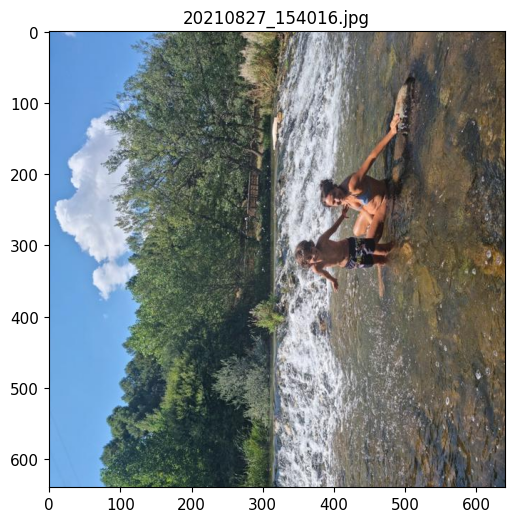

In [115]:
rivers_lakes_images_filepath_list = []
rivers_lakes_images_filename_list = []
for neighbor_river_lake in neighbors_rivers_lakes:
    rivers_lakes_images_filepath_list.append(os.path.join(PATH_IMAGENES_A_ANALIZAR+'_resized',neighbor_river_lake))
    rivers_lakes_images_filename_list.append(neighbor_river_lake)

# Se cargan las imágenes en formato PIL en una lista pora poderlas mostrar en un grid
images_rgb_list= []
for i, image in enumerate(rivers_lakes_images_filepath_list):
    image_rgb = Image.open(image)
    images_rgb_list.append(image_rgb)

# Se muestran las imágenes en un grid usando un metodo propio del helper de imágenes
%matplotlib inline
ImageHelper.display_images(images_rgb_list,columns=3,max_images=1,label_font_size=12)

### 6.2.3. Matriz de confusión modelo 1 (Ríos y lagos con contorno)

Se obtiene la matriz de confusión de las predicciones con el primer modelo de detección de agua de rios/lagos.

In [138]:
# Primero se obtienen los valores de "Rios/lagos" etiquetados manualmente en todas las imágenes.
df_images_rivers_lakes_manual = df_images_labeled_manually[['Image','Rios/lagos']].copy()
# Se obtienen las imágenes del grafo con una confidencialidad mayor de 0.8
neighbors_rivers_lakes = imagesGraphDB.get_images_containing_list_object_types_with_min_confidence(['water'],[0.7])
# Se obtiene el dataframe de imágenes detectadas mediante el primer modelo
df_images_water_detected = pd.DataFrame(neighbors_rivers_lakes, columns=['Image'])
df_images_water_detected['Rios/lagos predicted'] =1
# Se cruzan ambos dataframes
df_images_water_analysis = df_images_rivers_lakes_manual.merge(df_images_water_detected , how="left", left_on="Image", right_on="Image")
# Se informa con valor 0 aquellas imagenes sin detección de rios y lagos
# en lugar de NA
df_images_water_analysis['Rios/lagos predicted'] = df_images_water_analysis['Rios/lagos predicted']. fillna(0)

# Se convierte a int la columna ya que se usa como booleano
df_images_water_analysis['Rios/lagos predicted'] = df_images_water_analysis['Rios/lagos predicted'].astype('int')

df_images_water_analysis

Image  Rios/lagos  Rios/lagos predicted
0                        20210724_100218.jpg           0                     0
1                        20210724_104730.jpg           0                     1
2                        20210724_104736.jpg           0                     1
3                        20210724_104739.jpg           0                     1
4                        20210724_104743.jpg           0                     1
...                                      ...         ...                   ...
1360  IMG_20180505_212946_BURST001_COVER.jpg           0                     1
1361        IMG_20180505_212946_BURST002.jpg           0                     1
1362        IMG_20180505_212946_BURST003.jpg           0                     1
1363                 IMG_20180822_173932.jpg           0                     0
1364                 IMG_20180824_195613.jpg           0                     0

[1365 rows x 3 columns]

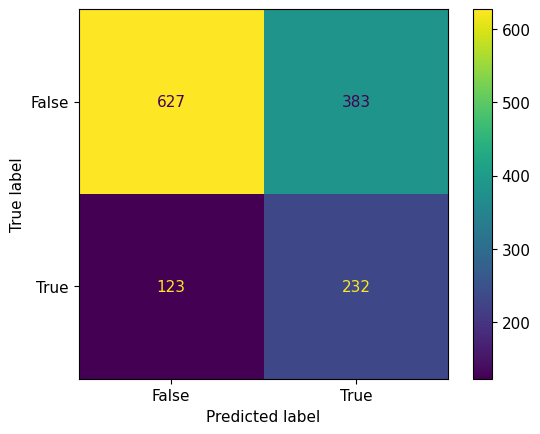

In [139]:
from sklearn import metrics

# Se cargan los resultados de la predicción y el real
images_rivers_lakes_actual= df_images_water_analysis['Rios/lagos'].to_numpy()
images_rivers_lakes_predicted= df_images_water_analysis['Rios/lagos predicted'].to_numpy()
# Se cargan los datos para generar la matriz de confusión
confusion_matrix = metrics.confusion_matrix(images_rivers_lakes_actual, images_rivers_lakes_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# Se muestra el gráfico
cm_display.plot()
plt.show()

### 6.2.5. Métricas modelo 1 (Ríos y lagos con contorno)

In [142]:
analyticsHelper = AnalyticsHelper()
metrics = analyticsHelper.getBinaryClassificationConfusionMatrixMetrics(confusion_matrix)
metrics

{'recall': 0.6535211267605634,
 'precision': 0.3772357723577236,
 'accuracy': 0.6293040293040293,
 'specificity': 0.6207920792079208,
 'f1_score': 0.47835051546391755}

### 6.2.2. Imágenes modelo 2 (Rios y lagos sin elementos intermedios)

Se cargan las imágenes en que se han detectado agua utilizando el modelo entrenado con "boundary boxes" sin elementos intermedios y recortando imágenes para que no apareciesen otros elementos que no fuesen el agua.

In [119]:
# Se cargan las imágenes con agua detectada a partir del primer modelo con boundary boxes completos
imagesGraphDB.load_graph_from_yolo_detected_objects_txt_files(PATH_RIVERS_LAKES2_LABELS_REF_FILE,PATH_RIVERS_LAKES2_DETECTED_LABELS)

# Se obtiene las imágenes del grafo que se relacionan con los nodos "person" y "cake"
object_classes_to_filter = ['water2'] # Se cogerán las imagenes con pasteles, personas y velas encendidas
neighbors_rivers_lakes2 = imagesGraphDB.get_images_containing_list_object_types_with_min_confidence(object_classes_to_filter,[0.95])

Se muestra una imágen obtenida bajo estos criterios.

Showing 1 images of 4:


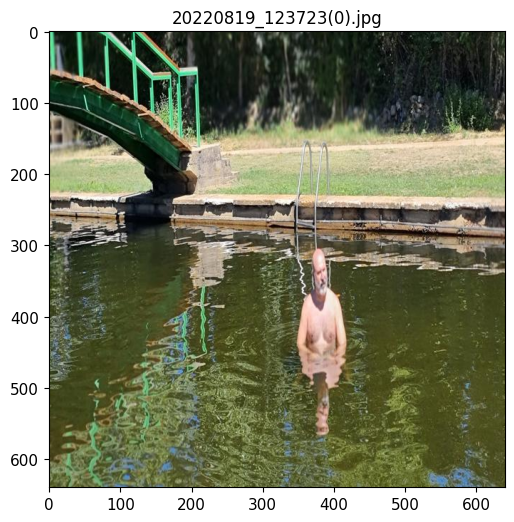

In [120]:
rivers_lakes2_images_filepath_list = []
rivers_lakes2_images_filename_list = []
for neighbor_river_lake in neighbors_rivers_lakes2:
    rivers_lakes2_images_filepath_list.append(os.path.join(PATH_IMAGENES_A_ANALIZAR+'_resized',neighbor_river_lake))
    rivers_lakes2_images_filename_list.append(neighbor_river_lake)

# Se cargan las imágenes en formato PIL en una lista pora poderlas mostrar en un grid
images_rgb_list= []
for i, image in enumerate(rivers_lakes2_images_filepath_list):
    image_rgb = Image.open(image)
    images_rgb_list.append(image_rgb)

# Se muestran las imagenes en un grid usando un metodo propio del helper de imágenes
%matplotlib inline
ImageHelper.display_images(images_rgb_list,columns=3,max_images=1,label_font_size=12)

### 6.2.4. Matriz de confusión modelo 2 (Ríos y lagos sin elementos intermedios)

Se repite el ejercicio de obtención de la matriz de confusión, pero esta vez para las predicciones del segundo modelo de detección de agua de rios y lagos.

In [140]:
neighbors_rivers_lakes2 = imagesGraphDB.get_images_containing_list_object_types_with_min_confidence(['water2'],[0.7])
# Se obtiene el dataframe de imágenes detectadas mediante el segundo modelo
df_images_water2_detected = pd.DataFrame(neighbors_rivers_lakes2, columns=['Image'])
df_images_water2_detected['Rios/lagos predicted'] =1
# Se cruzan ambos dataframes
df_images_water2_analysis = df_images_rivers_lakes_manual.merge(df_images_water2_detected , how="left", left_on="Image", right_on="Image")
# Se informa con valor 0 aquellas imagenes sin detección de rios y lagos
# en lugar de NA
df_images_water2_analysis['Rios/lagos predicted'] = df_images_water2_analysis['Rios/lagos predicted']. fillna(0)

# Se convierte a int la columna ya que se usa como booleano
df_images_water2_analysis['Rios/lagos predicted'] = df_images_water2_analysis['Rios/lagos predicted'].astype('int')

df_images_water2_analysis

Image  Rios/lagos  Rios/lagos predicted
0                        20210724_100218.jpg           0                     0
1                        20210724_104730.jpg           0                     0
2                        20210724_104736.jpg           0                     0
3                        20210724_104739.jpg           0                     0
4                        20210724_104743.jpg           0                     0
...                                      ...         ...                   ...
1360  IMG_20180505_212946_BURST001_COVER.jpg           0                     1
1361        IMG_20180505_212946_BURST002.jpg           0                     1
1362        IMG_20180505_212946_BURST003.jpg           0                     1
1363                 IMG_20180822_173932.jpg           0                     0
1364                 IMG_20180824_195613.jpg           0                     0

[1365 rows x 3 columns]

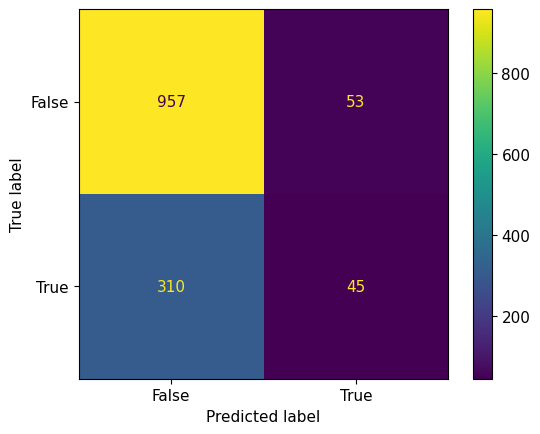

In [141]:
images_rivers_lakes2_actual= df_images_water2_analysis['Rios/lagos'].to_numpy()
images_rivers_lakes2_predicted= df_images_water2_analysis['Rios/lagos predicted'].to_numpy()

confusion_matrix2 = metrics.confusion_matrix(images_rivers_lakes2_actual, images_rivers_lakes2_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm_display.plot()
plt.show()

### 6.2.6. Métricas modelo 2 (Ríos y lagos sin elementos intermedios)

In [143]:
analyticsHelper = AnalyticsHelper()
metrics2 = analyticsHelper.getBinaryClassificationConfusionMatrixMetrics(confusion_matrix2)
metrics2

{'recall': 0.1267605633802817,
 'precision': 0.45918367346938777,
 'accuracy': 0.734065934065934,
 'specificity': 0.9475247524752475,
 'f1_score': 0.1986754966887417}

### 6.2.7. Imágenes combinación de modelos

In [144]:
# Se cargan las imágenes que han sido detectadas en ambos modelos
neighbors_rivers_lakes3 = imagesGraphDB.get_images_containing_list_object_types_with_min_confidence(['water','water2'],[0.7,0.7])
# Se obtiene el dataframe de imágenes detectadas mediante el segundo modelo
df_images_water3_detected = pd.DataFrame(neighbors_rivers_lakes3, columns=['Image'])
df_images_water3_detected['Rios/lagos predicted'] =1
# Se cruzan ambos dataframes
df_images_water3_analysis = df_images_rivers_lakes_manual.merge(df_images_water3_detected , how="left", left_on="Image", right_on="Image")
# Se informa con valor 0 aquellas imagenes sin detección de rios y lagos
# en lugar de NA
df_images_water3_analysis['Rios/lagos predicted'] = df_images_water3_analysis['Rios/lagos predicted']. fillna(0)

# Se convierte a int la columna ya que se usa como booleano
df_images_water3_analysis['Rios/lagos predicted'] = df_images_water3_analysis['Rios/lagos predicted'].astype('int')

df_images_water3_analysis

Image  Rios/lagos  Rios/lagos predicted
0                        20210724_100218.jpg           0                     0
1                        20210724_104730.jpg           0                     0
2                        20210724_104736.jpg           0                     0
3                        20210724_104739.jpg           0                     0
4                        20210724_104743.jpg           0                     0
...                                      ...         ...                   ...
1360  IMG_20180505_212946_BURST001_COVER.jpg           0                     1
1361        IMG_20180505_212946_BURST002.jpg           0                     1
1362        IMG_20180505_212946_BURST003.jpg           0                     1
1363                 IMG_20180822_173932.jpg           0                     0
1364                 IMG_20180824_195613.jpg           0                     0

[1365 rows x 3 columns]

### 6.2.8. Matriz de confusión de combinación de modelos

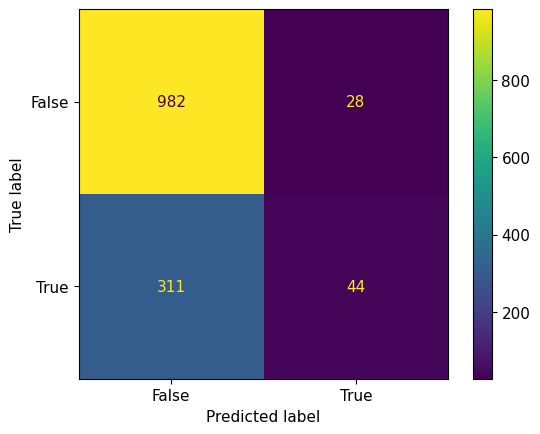

In [145]:
from sklearn import metrics

images_rivers_lakes3_actual= df_images_water3_analysis['Rios/lagos'].to_numpy()
images_rivers_lakes3_predicted= df_images_water3_analysis['Rios/lagos predicted'].to_numpy()

confusion_matrix3 = metrics.confusion_matrix(images_rivers_lakes3_actual, images_rivers_lakes3_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])

cm_display.plot()
plt.show()

### 6.2.9. Métricas de combinación de modelos

In [146]:
analyticsHelper = AnalyticsHelper()
metrics3 = analyticsHelper.getBinaryClassificationConfusionMatrixMetrics(confusion_matrix3)
metrics3

{'recall': 0.12394366197183099,
 'precision': 0.6111111111111112,
 'accuracy': 0.7516483516483516,
 'specificity': 0.9722772277227723,
 'f1_score': 0.20608899297423885}

In [149]:
# Se guarda el grafo del modelo combinado al tener mejores resultados que los resultados
# de modelos por separado
# Se guarda el grafo de las imagenes de rios y lagos
imagesGraphDB.write_gml_file(PATH_RIVERS_LAKES_GML_FILE)

### 6.2.10. Conclusiones

Se observa una mejoría en la precisión disminuyendo significativamente el número de falsos positivos. La combinación de los resultados, buscando la intersección de resultados provoca una mejora de las metricas con respecto de las que se obtienen en los modelos por separado.
